# Защита персональных данных клиентов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-исследования-и-план-работ" data-toc-modified-id="Цель-исследования-и-план-работ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цель исследования и план работ</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц--" data-toc-modified-id="Умножение-матриц---3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц <a id="justification" rel="nofollow"> </a></a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Шифрование-признаков" data-toc-modified-id="Шифрование-признаков-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Шифрование признаков</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Линейная-регрессия-для-данных-до-преобразования" data-toc-modified-id="Линейная-регрессия-для-данных-до-преобразования-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Линейная регрессия для данных до преобразования</a></span></li><li><span><a href="#Линейная-регрессия-для-данных-после-преобразования" data-toc-modified-id="Линейная-регрессия-для-данных-после-преобразования-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Линейная регрессия для данных после преобразования</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Итоги-исследования-и-общий-вывод" data-toc-modified-id="Итоги-исследования-и-общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоги исследования и общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Цель исследования и план работ

**Задача**  

Необходимо защитить данные клиентов страховой компании. Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.  

**Описание данных**  

*Признаки:* пол, возраст и зарплата застрахованного, количество членов его семьи.  
*Целевой признак:* количество страховых выплат клиенту за последние 5 лет.

**План работы**
1. Загрузите и изучите данные.
2. Ответьте на вопрос и обоснуйте решение.  
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)  
a. Изменится. Приведите примеры матриц.  
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.  
3. Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
4. Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

## Загрузка данных

Импортируем необходимые библиотеки для проведения исследования.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Загрузим и изучим данные.

In [2]:
df = pd.read_csv('/datasets/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Названия признаков некорректны. Изменим названия признаков.

In [3]:
df.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_pays']
df.head()

,gender,age,salary,family_members,insurance_pays
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.shape

(5000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5000 non-null   int64  
 1   age             5000 non-null   float64
 2   salary          5000 non-null   float64
 3   family_members  5000 non-null   int64  
 4   insurance_pays  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


В столбцах `age` и `salary` тип данных float может быть заменен на int. Убедимся, что все значения в столбце `salary` целочисленные.

In [6]:
# найдем остаток от деления на 1 для всего столбца
fractional_salary = df['salary'] % 1.0

# если отстаток не равен 0, то у числа есть дробная часть. Выведем такие числа на экран.
df['salary'].loc[fractional_salary[fractional_salary != 0].index] #

80      32700.0
159     64900.0
313     32700.0
392     32700.0
448     32700.0
772     65100.0
820     32200.0
872     32200.0
911     32200.0
963     64100.0
1020    32700.0
1078    32200.0
1336    32700.0
1485    32700.0
1486    32200.0
1847    32700.0
1981    32200.0
2191    32200.0
2287    32200.0
2342    32700.0
2385    32700.0
2439    32200.0
2443    32700.0
2805    32700.0
2994    32200.0
3063    64400.0
3139    32200.0
3352    32200.0
3466    32700.0
3499    65100.0
3614    32700.0
3717    32700.0
3788    32700.0
3824    32700.0
3938    32200.0
4182    32200.0
4520    32700.0
4833    32200.0
4935    32700.0
4998    32700.0
Name: salary, dtype: float64

Видим, что числа, где остаток от деления на 1 не равен нулю, тоже целые числа!!! Значит остаток - очень малое число, которое стремится у нулю из-зи особенностей хранения чисел в формате float.  Преобразуем типы данных в столбцах датафрейма для оптимизации затрат ресурсов.

In [7]:
df[['age', 'salary']] = df[['age', 'salary']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          5000 non-null   int64
 1   age             5000 non-null   int64
 2   salary          5000 non-null   int64
 3   family_members  5000 non-null   int64
 4   insurance_pays  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [8]:
df.describe()

,gender,age,salary,family_members,insurance_pays
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Исследуем выборку на мультиколлинеарность признаков. Построим матрицу корреляции признаков.

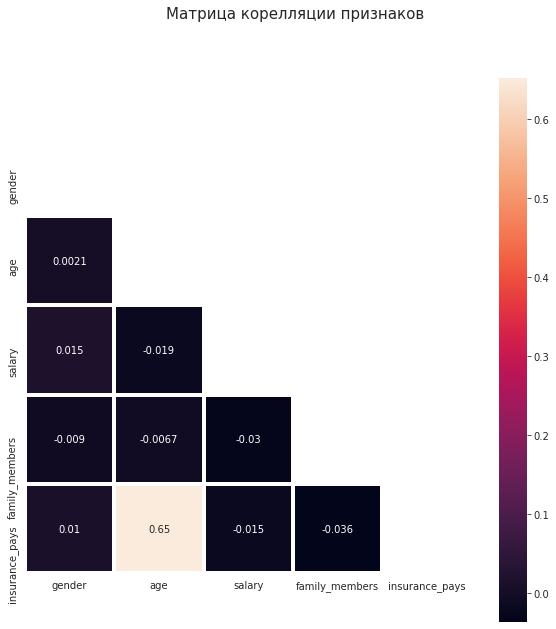

In [9]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    plt.suptitle('Матрица корелляции признаков', fontsize=15);
    ax = sns.heatmap(df_corr, mask=mask, square=True, annot=True, linewidths=3, linecolor='white')

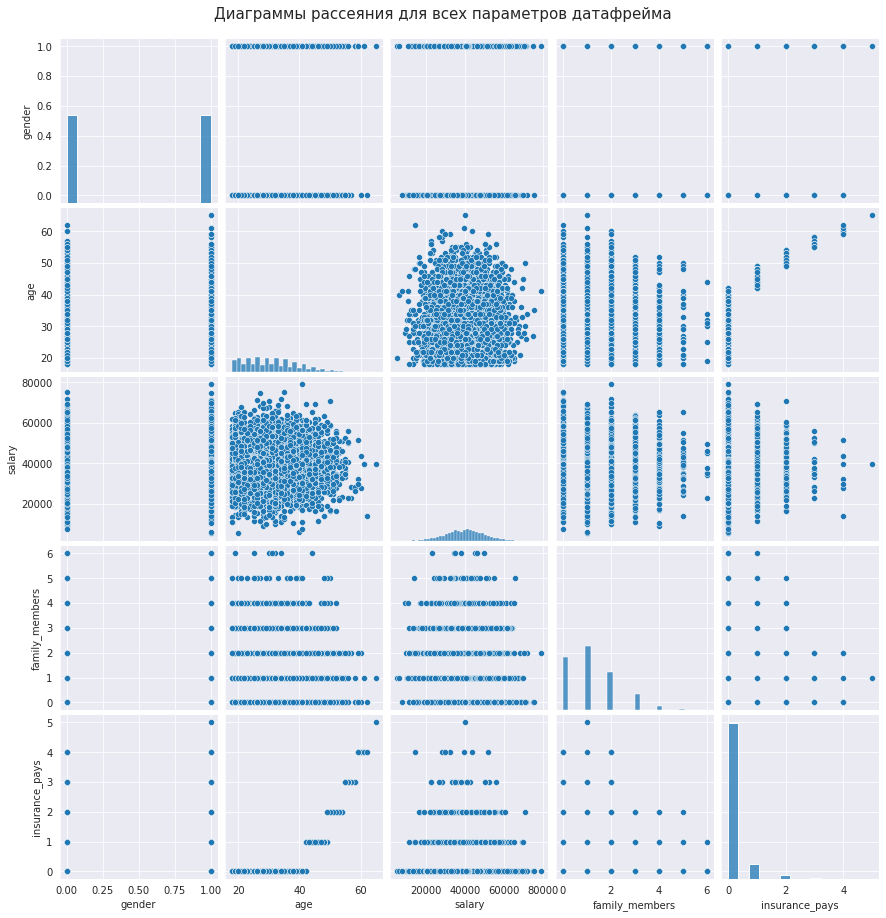

In [10]:
sns.set_style('darkgrid')
sns.pairplot(df, height=2.5, diag_kind='hist')
plt.suptitle('Диаграммы рассеяния для всех параметров датафрейма', y=1.02, fontsize=15)
plt.show()

Признаки age и insurance_pays имеют слабую линейную положительную взаимосвязь, коэффициент корелляции Пирсона 0.65, но взаимосвязь между признаком и целевым признаком допустима. Это логично, что с увеличением возраста увеличивается и количество выплат. Между другими признаками взаимосвязь отсутствует. Мультиколлинеарности нет.

**Вывод:** 
1) в таблице были исправлены названия признаков с кириллицы на латиницу, "змеиный" формат;  
2) в выборке 5000 строк и 5 столбцов;    
3) пропусков в данных нет, обработка пропусков не требуется;  
4) были преобразованы типы данных в столбцах `age` и `salary` c *flaot* на *int*;  \
5) столбцы с числовыми данными `age`, `salary`, `family_members` и `insurance_pays` не имеют выбросов, обработка аномальных значений не требуется;  
6) датафрейм был проверен на мультиколлинеарность признаков - мультиколлинеарности нет.

## Умножение матриц <a id='justification'> </a>

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** b. Не изменится.

**Обоснование:**  
Найдем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.  

Пусть $А$ - обратимая матрица, а $w_{A}$ - параметр линейной регрессии для преобразованной матрицы.
Запишем формулу параметра линейной регрессии для $X$, умноженной на обратимую матрицу $А$.  

$$ 
w_{A} = ((XA)^TXA)^{-1}(XA)^Ty 
$$  

Преобразуем правую часть формулы, используя свойства операции транспонирования матриц и обратной матрицы и помня, что обратная матрица может быть только квадратной:

$$ 
(AB)^T = B^TA^T 
$$

$$ 
(ABС)^{-1} = С^{-1}B^{-1}A^{-1} 
$$

$$ 
w_{A} = ((XA)^TXA)^{-1}(XA)^Ty = (A^{T}(X^{T}X)A)^{-1}A^{T}X^{T}y = A^{-1}(X^{T}X)^{-1}(A^{T})^{-1}A^{T}X^{T}y = A^{-1}(X^TX)^{-1}X^Ty
$$  


Таким образом параметры линейной регрессии для исходной матрицы признаков и умноженной на обратимую матрицу имеют следующую зависимость:

$$ 
w_{A} = A^{-1}(X^TX)^{-1}X^Ty = A^{-1}w 
$$  

Запишем формулу предсказаний для преобразованной матрицы:

$$
a_{A} = XAw_{A} = XAA^{-1}w = Xw = a
$$

Качество линейной регрессии не изменится, так как вектор предсказаний для исходной матрицы признаков и умноженной на обратимую матрицу - это один и тот же вектор.

## Алгоритм преобразования

**Алгоритм для защиты данных**

1) генерируем в цикле случайным образом обратимую матрицу ${A}$ размерностью n x n, где n - количество признаков, до тех пор, пока её определитель не станет отличен от нуля, значит мы нашли обратимую матрицу и цикл прерывается;  
2) умножаем матрицу признаков на матрицу ${A}$ и получаем преобразованную матрицу признаков $X_{A}$;  
3) проводим масштабирование признаков $X_{A}$;  
4) обучаем модель на преобразованных признаках и получаем предсказания.

**Обоснование**

Как уже было доказано в [п.3](#justification) качество линейной регрессии не изменится, так как вектор предсказаний для исходной матрицы признаков и умноженной на обратимую матрицу - это один и тот же вектор. При умножении матрицы признаков X раpмерностью $ (m\times 4) $ на обратимую матрицу A размерностью $(4\times 4)$  мы получаем новую матрицу, элементы которой получаются следующим образом:
$$
\dot{X_{11}} = X_{11} \times A_{11} + X_{12} \times A_{21} + X_{13} \times A_{31} + X_{14} \times A_{41}
$$
$$
\dot{X_{m4}} = X_{m1} \times A_{14} + X_{m2} \times A_{24} + X_{m3} \times A_{34} + X_{m4} \times A_{44}
$$

## Проверка алгоритма

Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2 для оценки.

### Подготовка данных

Подготовим данные для обучения: разделим признаки и целевой признак.

In [11]:
features = df.drop('insurance_pays', axis=1)
target = df['insurance_pays']

Разделим выборки на обучающую и тестовую:

In [12]:
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.25, random_state=12345)
print(train_features.shape, test_features.shape)

(3750, 4) (1250, 4)


### Шифрование признаков

Запрограммируем наш алгоритм для защиты данных при обучении модели. Создадим класс Encryption с функциями `encrypt` для шифрования данных и `decrypt` для дешифрования. 
<a name="encryption"></a>

In [13]:
class Encryption:
    
    def encrypt(self, train_features, test_features):
        '''
        Метод шифрует обучающую и тестовую выборки.
        Метод генерирует случайную матрицу a и проверяет её на обратимость. 
        Матрица обратима тогда и только тогда, когда она невырождена, то есть её определитель не равен нулю.
        Метод возвращает преобразованную матрицу - исходную матрицу, умноженную на обратимую матрицу.
        Метод сохраняет матрицу-ключ key для дешифровки данных клиента
        '''
        n = train_features.shape[1]
        flag = True
        while flag:
            r = np.random.RandomState(12345)
            a = r.randint(10, size=(n,n))
            determinant = np.linalg.det(a)
            if determinant != 0:
                flag = False
        self.key = np.linalg.inv(a)
        self.train_features_columns = train_features.columns
        self.test_features_columns = test_features.columns
        encrypted_train_features = train_features.dot(a)
        encrypted_test_features = test_features.dot(a)
        return encrypted_train_features, encrypted_test_features
    
    def decrypt(self, train_features, test_features):
        '''
        Метод дешифрует обучающую и тестовую выборки.
        '''
        decrypted_train_features = np.round(train_features.dot(self.key)).astype(int)
        decrypted_train_features.columns = self.train_features_columns
        decrypted_test_features = np.round(test_features.dot(self.key)).astype(int)
        decrypted_test_features.columns = self.test_features_columns
        return decrypted_train_features, decrypted_test_features

Зашифруем данные и выведем на экран первые 5 строк обучающей выборки

In [14]:
encryption = Encryption()
encrypted_train_features, encrypted_test_features = encryption.encrypt(train_features, test_features)
encrypted_train_features.head()

,0,1,2,3
3369,217595,36420,325889,253456
1441,345908,57775,518469,403238
571,246894,41260,369966,287741
225,270930,45280,405974,315745
2558,303909,50765,455470,354251


В результате данные клиентов зашифрованы.

Теперь проверим как работает расшифровка.

In [15]:
decrypted_train_features, decrypted_test_features = encryption.decrypt(encrypted_train_features, encrypted_test_features)
decrypted_train_features.head()

,gender,age,salary,family_members
3369,1,43,36200,1
1441,1,34,57600,0
571,0,32,41100,1
225,0,36,45100,1
2558,0,33,50600,2


Сравним с исходной обучающей выборкой до преобразования.

In [16]:
train_features.head()

,gender,age,salary,family_members
3369,1,43,36200,1
1441,1,34,57600,0
571,0,32,41100,1
225,0,36,45100,1
2558,0,33,50600,2


### Масштабирование признаков

Напишем функцию для масштабирования признаков.

In [17]:
def scaling(train_features, test_features):
    '''
    Метод осуществляет масштабирование признаков обучающей и тестовой выборок методом стандартизации данных.
    Метод возвращает обучающую и тестовую выборки с масштабированными признаками.
    '''
    scaler = StandardScaler()
    scaler.fit(train_features)
    train_features = scaler.transform(train_features)
    test_features = scaler.transform(test_features)
    return train_features, test_features

Масштабирование признаков до преобразования.

In [18]:
train_features_scaled, test_features_scaled = scaling(
    train_features, test_features)

Масштабирование признаков после преобразования.

In [19]:
encrypted_train_features_scaled, encrypted_test_features_scaled = scaling(
    encrypted_train_features, encrypted_test_features)

### Линейная регрессия для данных до преобразования

In [20]:
model = LinearRegression()
model.fit(train_features_scaled, train_target)
predictions = model.predict(test_features_scaled)
result = pd.DataFrame({'Линейная регрессия до преобразования' : r2_score(test_target, predictions)}, index=['R2'])
result['Линейная регрессия до преобразования']

R2    0.435228
Name: Линейная регрессия до преобразования, dtype: float64

### Линейная регрессия для данных после преобразования

In [21]:
model.fit(encrypted_train_features_scaled, train_target)
predictions = model.predict(encrypted_test_features_scaled)
result['Линейная регрессия после преобразования'] = r2_score(test_target, predictions)
result['Линейная регрессия после преобразования']

R2    0.435228
Name: Линейная регрессия после преобразования, dtype: float64

### Вывод

In [22]:
result

,Линейная регрессия до преобразования,Линейная регрессия после преобразования
R2,0.435228,0.435228


Качество линейной регрессии из sklearn не отличается до и после преобразования. 

## Итоги исследования и общий вывод

В данной работе был разработан метод преобразования данных для защиты персональной информации при построении модели линейной регрессии не влияющий на качество модели машинного обучения.  
Нам был предоставлен исходный датасет. Обзор данных показал, что:  
1) в таблице были исправлены названия признаков с кириллицы на латиницу, "змеиный" формат;  
2) в выборке 5000 строк и 5 столбцов;    
3) пропусков в данных нет, обработка пропусков не требуется;  
4) были преобразованы типы данных в столбцах `age` и `salary` c *flaot* на *int*;  \
5) столбцы с числовыми данными `age`, `salary`, `family_members` и `insurance_pays` не имеют выбросов, обработка аномальных значений не требуется;  
6) мультиколлинеарности признаков в датафрейме нет.

Далее мы выяснили, что качество линейной регрессии не изменится, если признаки умножают на обратимую матрицу, и обосновали это, выведя формулу связи параметров линейной регрессии до и после преобразования. Мы доказали математически, что вектор предсказаний для исходной матрицы признаков и умноженной на обратимую матрицу - это один и тот же вектор.

В соответствии с этим был предложен и проверен алгоритм преобразования данных для решения задачи.

Проверка показала, что качество линейной регрессии из sklearn не отличается для данных до и после преобразования.